## Solution 4.06

In [21]:
# Basic libraries
import pymysql
import pandas as pd # data manipulatioN
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import plotly.express as px #Visualization
import warnings # warning messages management
from scipy.stats import norm
from scipy import stats

# Machine Learning
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error #LR metrics
#from sklearn.linear_model import LogisticRegression # logistic model
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score # logistic metrics
from sklearn.neighbors import KNeighborsRegressor #KNN
#from sklearn import metrics # more metrics
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings
%matplotlib inline

## <span style="color:#7B241C"> 1</span>

In [2]:
#Import data from the file 
customer_df=pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv",sep=",") # Paste here the path. 
customer_df.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2308,UE76013,Washington,5039.869278,No,Extended,Master,2/4/11,Employed,F,35984,Rural,Married,128,7,68,3,1,Personal Auto,Personal L3,Offer2,Call Center,275.577631,SUV,Medsize
7412,LA20890,Oregon,2846.645431,No,Basic,Bachelor,1/28/11,Employed,F,66880,Suburban,Married,71,7,54,0,1,Personal Auto,Personal L3,Offer4,Branch,340.800000,Four-Door Car,Medsize
5379,KB90888,Oregon,2561.576924,No,Basic,High School or Below,1/3/11,Unemployed,F,0,Suburban,Single,73,25,5,0,1,Corporate Auto,Corporate L1,Offer2,Branch,842.876080,Two-Door Car,Medsize
2240,AP65984,Oregon,4881.753428,No,Extended,College,2/26/11,Unemployed,F,0,Suburban,Single,135,0,86,0,1,Personal Auto,Personal L1,Offer2,Agent,648.000000,SUV,Medsize
8102,DH18269,Arizona,10614.644570,No,Extended,College,1/13/11,Medical Leave,M,16040,Suburban,Divorced,96,29,93,0,2,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize
8424,HP42153,Washington,2351.878675,No,Basic,High School or Below,1/29/11,Medical Leave,F,12928,Suburban,Single,64,12,74,0,1,Personal Auto,Personal L3,Offer1,Agent,307.200000,Four-Door Car,Medsize
5235,KW52549,Arizona,27789.692350,Yes,Extended,Bachelor,1/20/11,Employed,F,33806,Urban,Divorced,89,32,59,0,2,Personal Auto,Personal L3,Offer2,Web,395.729716,Four-Door Car,Medsize
2319,OW85480,California,5348.071007,No,Basic,Master,1/4/11,Medical Leave,M,25545,Suburban,Married,69,19,49,0,9,Personal Auto,Personal L3,Offer1,Agent,331.200000,Four-Door Car,Medsize
2476,KR17533,Oregon,3954.538361,No,Basic,Doctor,2/27/11,Employed,M,40175,Rural,Divorced,102,34,78,1,1,Personal Auto,Personal L1,Offer3,Branch,154.721555,SUV,Medsize
1798,CB62406,Arizona,6803.596768,No,Premium,High School or Below,2/4/11,Employed,M,43758,Suburban,Married,171,16,29,0,1,Corporate Auto,Corporate L3,Offer1,Call Center,1129.929433,SUV,Medsize


In [3]:
customer_df=customer_df.drop(columns=['Customer'])
#Standarize column names following PE8
cols = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns = cols
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   effective_to_date              9134 non-null   object 
 6   employmentstatus               9134 non-null   object 
 7   gender                         9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

In [4]:
#Before splitting 
#Effective to date is a date, not categorical
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
customer_df.sample(4)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

In [6]:
#Split dataframe into numerical and categorical
#numericals_df=customer_df.select_dtypes(include=["float", "int"])
#categorical_df=customer_df.select_dtypes(include=[object]) 

In [7]:
#Split dataframe into numerical, categorical, date and target
numericals_continuous_df=customer_df.select_dtypes(include=["float", "int"])
numericals_continuous_df=numericals_continuous_df.drop(columns=['months_since_last_claim','months_since_policy_inception','total_claim_amount','number_of_open_complaints','number_of_policies'])
numericals_discrete_df=customer_df[['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
categorical_df=customer_df.select_dtypes(include=[object]) 
#categorical_df=categorical_df.drop(columns=['number_of_open_complaints','number_of_policies'])
date_df=customer_df.select_dtypes(include=["datetime"])
Target_df=customer_df[['total_claim_amount']]#Dont Normalize or transform

## <span style="color:#7B241C"> 2</span>

In [9]:
numericals_continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   int64  
 2   monthly_premium_auto     9134 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 214.2 KB


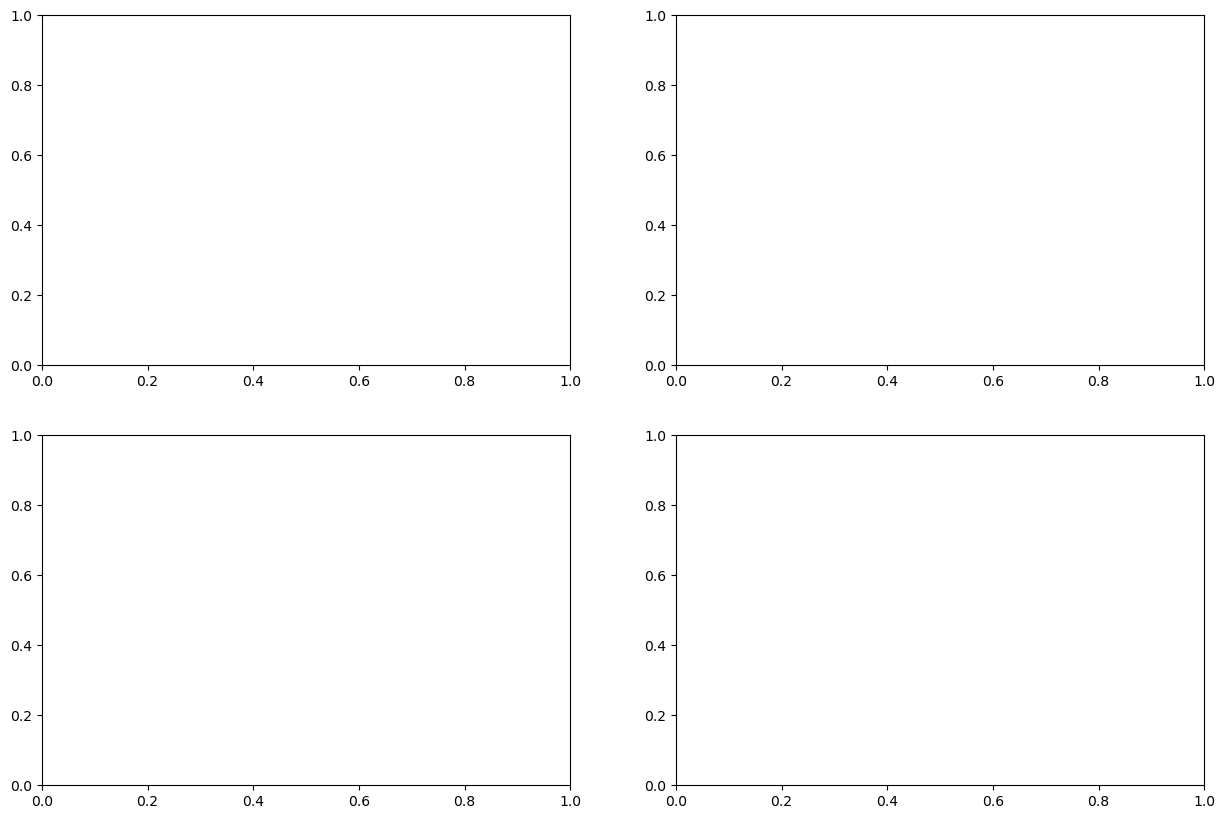

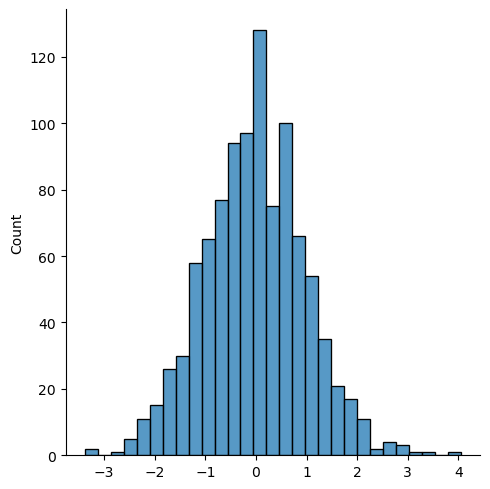

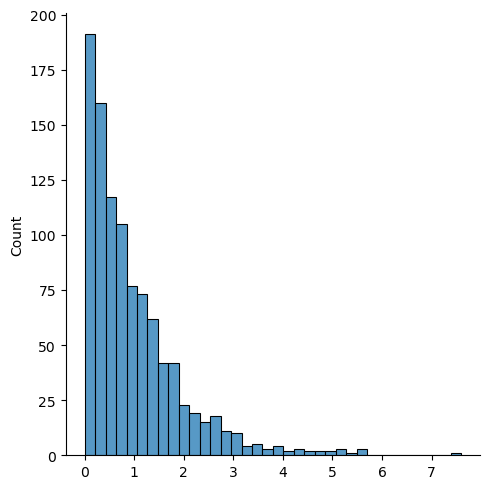

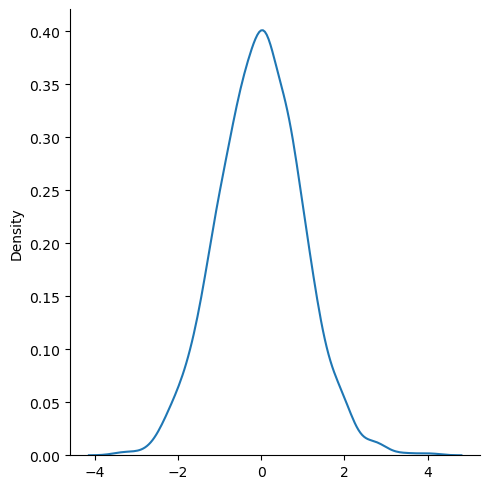

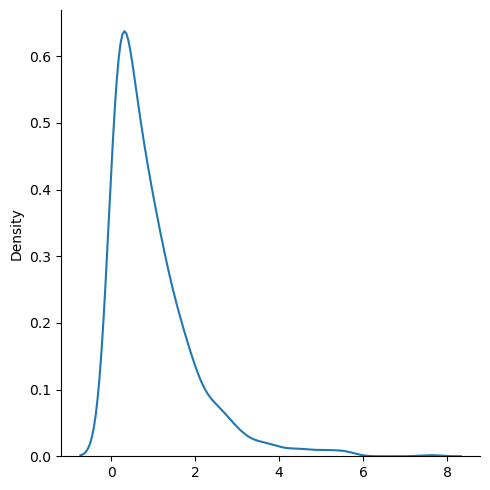

In [10]:
# Generate some random data
normal_data = np.random.normal(size=1000)
exp_data = np.random.exponential(size=1000)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot distribution plots for each variable
sns.displot(normal_data, ax = axes[0, 0], kind='hist', label='Normal')
sns.displot(exp_data, ax = axes[0, 1], kind='hist', label='Exponential')
sns.displot(normal_data, ax = axes[1, 0], kind='kde', label='Normal')
sns.displot(exp_data, ax = axes[1, 1], kind='kde', label='Exponential')

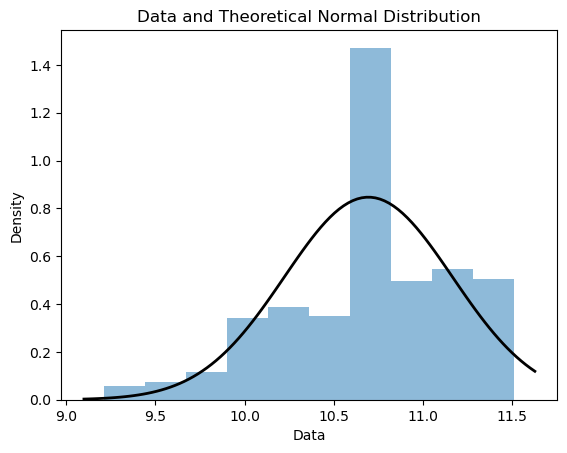

In [34]:
# Generate random data
data = numericals_continuous_df['income'],

# Calculate mean and standard deviation of data
mu, std = norm.fit(data)

# Create histogram of data
plt.hist(data, density=True, alpha=0.5)

# Plot theoretical normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Set axis labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Data and Theoretical Normal Distribution')

# Display graph
plt.show()

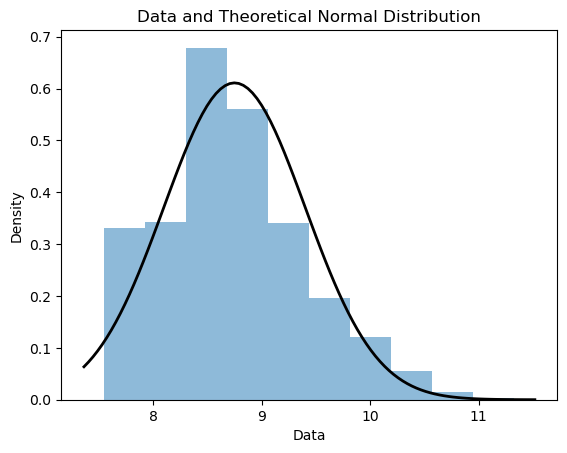

In [32]:
# Generate random data
data = numericals_continuous_df['customer_lifetime_value'],

# Calculate mean and standard deviation of data
mu, std = norm.fit(data)

# Create histogram of data
plt.hist(data, density=True, alpha=0.5)

# Plot theoretical normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Set axis labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Data and Theoretical Normal Distribution')

# Display graph
plt.show()

## <span style="color:#7B241C"> 3</span>
Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

>This is not a transformation but a scaler I want to see what happens

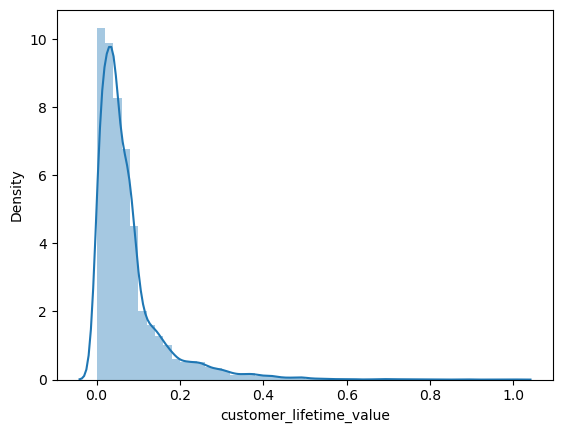

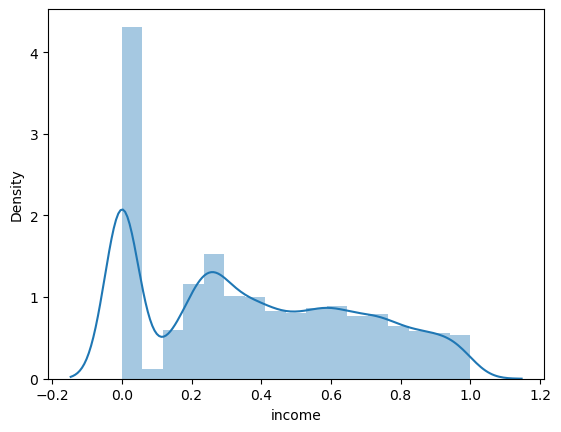

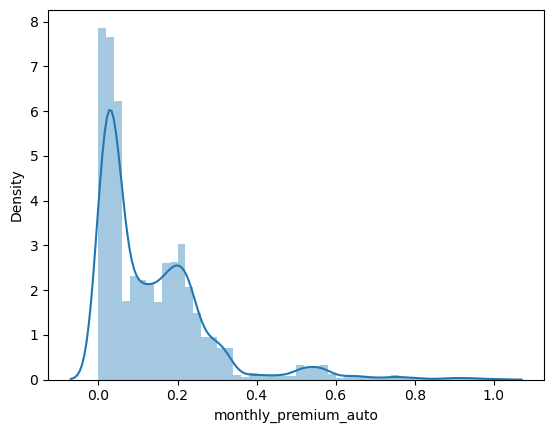

In [16]:
#Scaler

transformer = MinMaxScaler().fit(numericals_continuous_df) 
x_minmax = transformer.transform(numericals_continuous_df) #Array
X_num_minmax = pd.DataFrame(x_minmax,columns=numericals_continuous_df.columns) ## Convert to dataframe

# Print the dristribution plots for the numerical values. 
for column in X_num_minmax.columns:
    sns.distplot(X_num_minmax[column])
    plt.show()

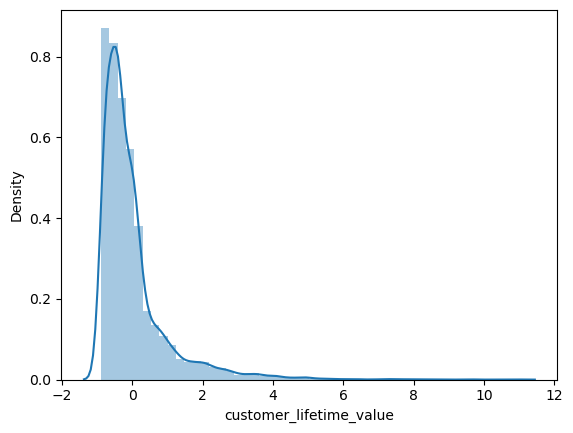

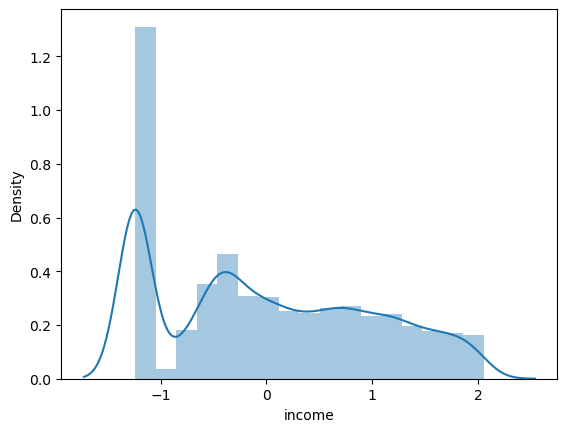

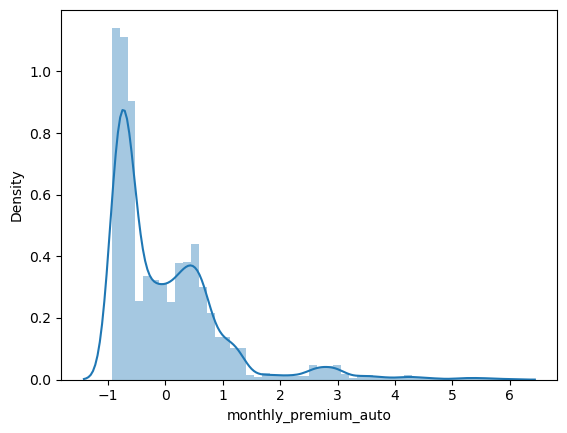

In [17]:
#Scaler
#I use Standarization to put the mean in 0

transformer = StandardScaler().fit(numericals_continuous_df)
x_standardized = transformer.transform(numericals_continuous_df)
X_num_stand = pd.DataFrame(x_standardized, columns=numericals_continuous_df.columns)

# Print the dristribution plots for the numerical values. 
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

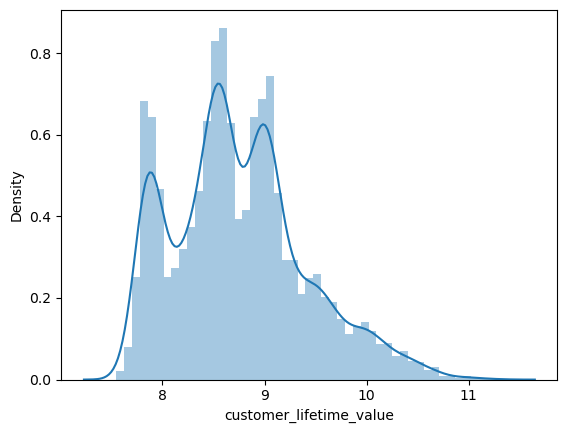

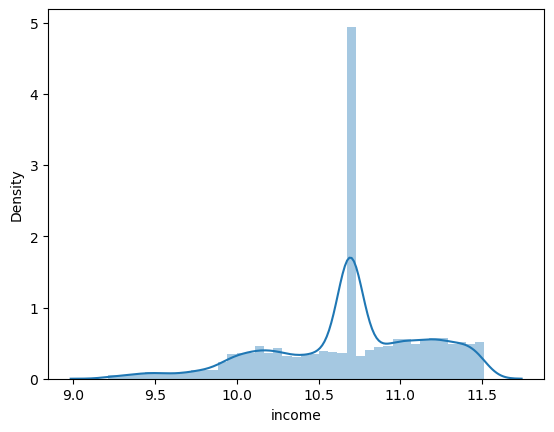

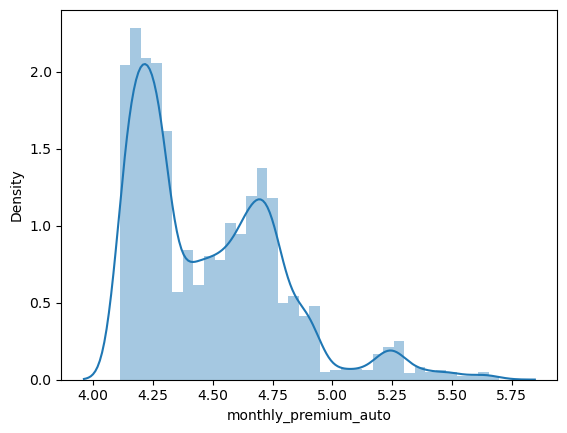

In [19]:
#See what happens with log transformation
#I use Log Transformation
X_num_log=numericals_continuous_df
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

for column in X_num_log.columns:
    X_num_log[column] = list(map(log_transfom_clean, X_num_log[column])) #Transformation
    X_num_log[column] = X_num_log[column].fillna(np.mean(X_num_log[column]))    #Clean NAN
    
# Print the dristribution plots for the numerical values. 
for column in X_num_log.columns:
    sns.distplot(X_num_log[column])
    plt.show()

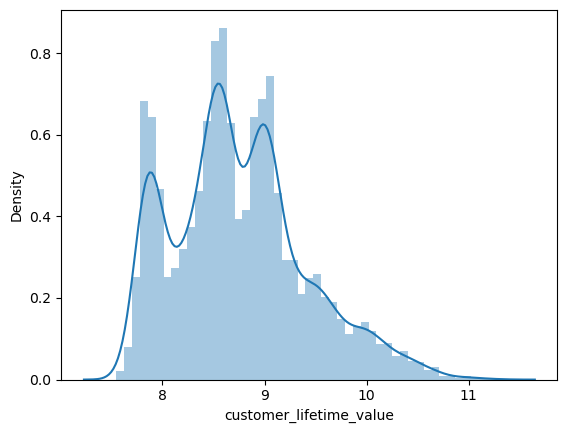

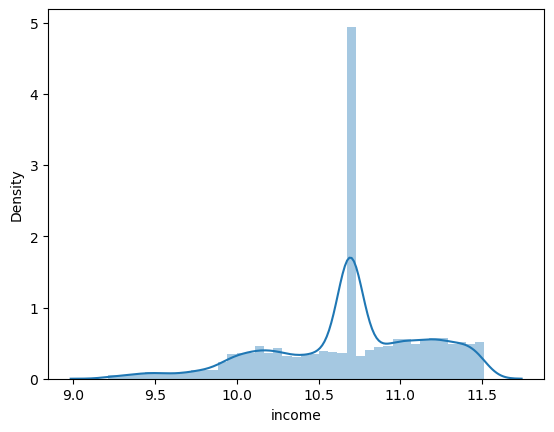

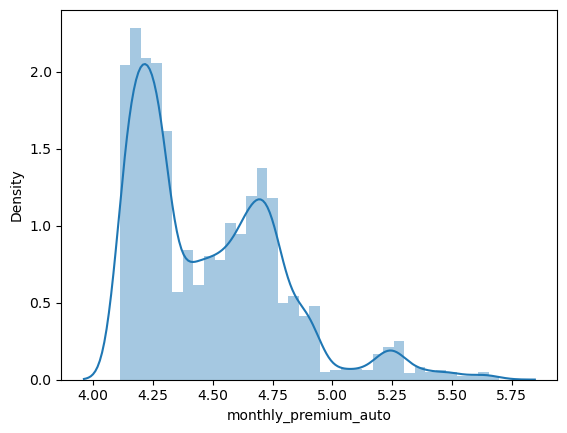

In [22]:
#I use with BOX-COX Transformation
X_num_BC=numericals_continuous_df


for column in X_num_BC.columns:
    X_num_BC[column] = np.where(X_num_BC[column]<=0, np.NAN, X_num_BC[column]) # data['HV1'].mean()
    X_num_BC[column] = X_num_BC[column].fillna(X_num_BC[column].mean())
    transformed_data, _ci = stats.boxcox(X_num_BC[column])
    
# Print the dristribution plots for the numerical values. 
for column in X_num_BC.columns:
    sns.distplot(X_num_BC[column])
    plt.show()

>I see that log transformation and box cox get exacthly the same result.